# Setup and load library

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Input, MaxPool2D, Conv2D, Dense, Dropout
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings(action='ignore')

In [3]:
# Enable auto completion for Keras library

%config Completer.use_jedi = False

### Loading Mnist dataset from Keras 

In [4]:
mnist = keras.datasets.mnist

In [5]:
targets = { 0: '0',
            1: '1',
            2: '2',
            3: '3',
            4: '4',
            5: '5',
            6: '6',
            7: '7',
            8: '8',
            9: '9'}

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Prepare data

In [7]:
X_train = X_train.astype(np.float32) / 255.
X_test  = X_test.astype(np.float32) / 255.

In [8]:
X_train = X_train.reshape(-1, 28,28,1)
X_test  = X_test.reshape(-1, 28,28,1)

## Data Augmentation

#### To increase the diversity of data available for training models, without actually collecting new data.

In [9]:
datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(X_train)

### One hot encode

In [10]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


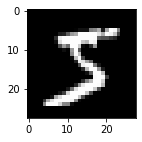

In [11]:
# Display the first image
plt.figure(figsize=(2,2))
plt.imshow(X_train[0].reshape(28,28), cmap='gray')

# Build the model

In [13]:
in_put = Input(shape=(28,28,1))
X = Conv2D(kernel_size=(3,3), filters=32, activation='relu', padding='SAME', kernel_initializer='he_normal')(in_put)
X = MaxPool2D(pool_size=(2,2))(X)
X = Conv2D(kernel_size=(3,3), filters=64, activation='relu')(X)
X = MaxPool2D(pool_size=(2,2))(X)
X = Conv2D(kernel_size=(3,3), filters=128, activation='relu')(X)
X = Flatten()(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.4)(X)
out_put = Dense(10, activation='softmax')(X)

model = Model(in_put, out_put)

# Train the model

In [14]:
adam = keras.optimizers.Adam(learning_rate=0.001)

In [15]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 19s 25ms/step - loss: 0.1764 - accuracy: 0.9454 - val_loss: 0.0532 - val_accuracy: 0.9850
Epoch 2/10
750/750 [==============================] - 19s 25ms/step - loss: 0.0577 - accuracy: 0.9825 - val_loss: 0.0438 - val_accuracy: 0.9877
Epoch 3/10
750/750 [==============================] - 19s 26ms/step - loss: 0.0407 - accuracy: 0.9879 - val_loss: 0.0405 - val_accuracy: 0.9877
Epoch 4/10
750/750 [==============================] - 19s 25ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0305 - val_accuracy: 0.9911
Epoch 5/10
750/750 [==============================] - 19s 26ms/step - loss: 0.0239 - accuracy: 0.9925 - val_loss: 0.0453 - val_accuracy: 0.9873
Epoch 6/10
750/750 [==============================] - 19s 26ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0362 - val_accuracy: 0.9908
Epoch 7/10
750/750 [==============================] - 19s 26ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0426 - val_accuracy:

# Evaluate the value

In [17]:
model.evaluate(X_test, y_test, batch_size=64)

157/157 [==============================] - 1s 7ms/step - loss: 0.0371 - accuracy: 0.9912


[0.03710748627781868, 0.9911999702453613]

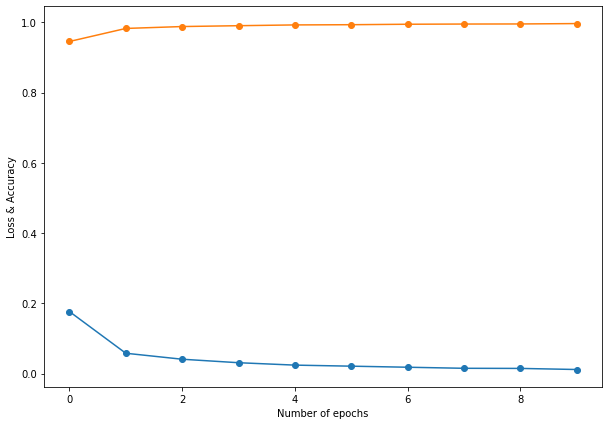

In [22]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], '-o', label='Loss')
plt.plot(history.history['accuracy'], '-o' ,label='Accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Loss & Accuracy')

plt.show()

# Test the model

In [23]:
predictions = model.predict(X_test)

In [24]:
predictions = tf.argmax(predictions, 1).numpy()

In [26]:
y_test_data = np.argmax(y_test, axis=1)

### compare labels(y_test_data) with predictions(y_predictions)

In [27]:
cross = pd.crosstab(y_test_data, predictions, rownames=['labels'], colnames=['predictions'])

<AxesSubplot:xlabel='predictions', ylabel='labels'>

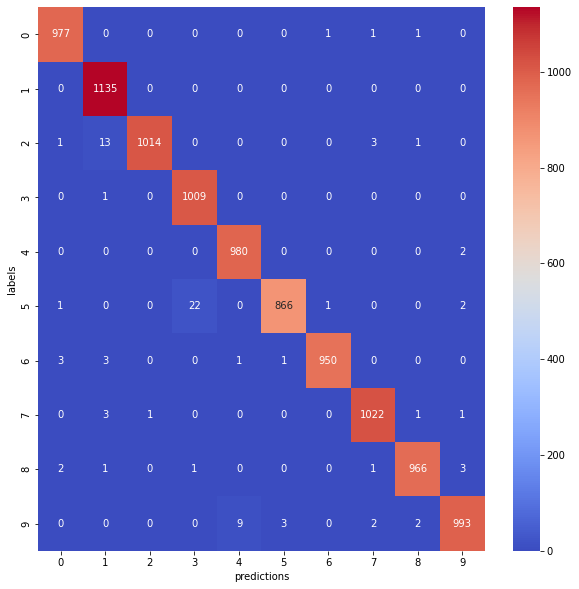

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(cross, annot=True, cmap='coolwarm', fmt='g')

### classification report (f1, precision score)

In [29]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.97      0.98       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Identify wrong predictions 

In [35]:
false_predictions = [i for i in range(y_test.shape[0]) if predictions[i] != y_test_data[i]]

In [36]:
# List the first ten wrong predictions
false_predictions[0:10]

[92, 326, 340, 412, 435, 445, 646, 659, 674, 882]

### print the first 25 images predicted wrong

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


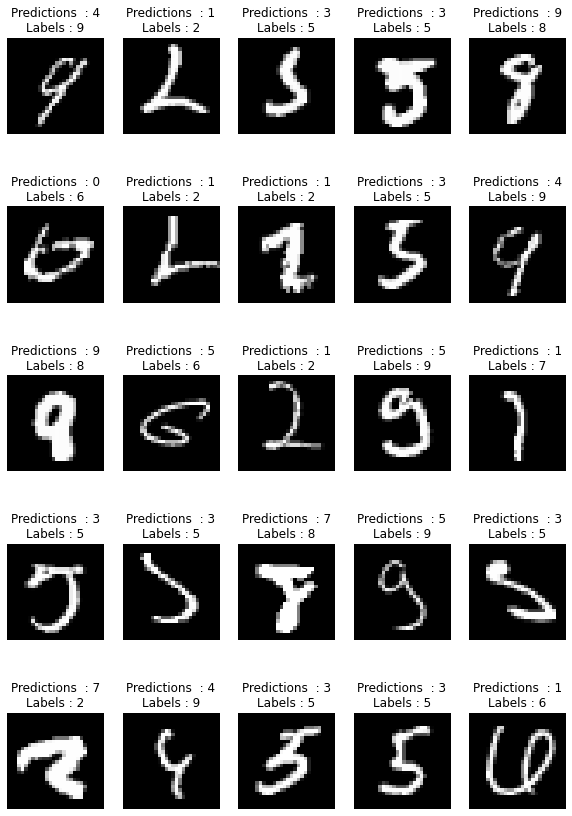

<Figure size 432x288 with 0 Axes>

In [38]:
rows = 5 
cols = 5
index = 0

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (10,15))

for i in range(5):
    for j in range(5):
        false_index = false_predictions[index]
        ax[i][j].imshow(X_test[false_index, :,:,-1], cmap='gray')
        ax[i][j].set_title(f"Predictions  : {targets[predictions[false_index]]}\nLabels : {targets[y_test_data[false_index]]}")
        index += 1
        ax[i][j].axis("off")
        

plt.show()
plt.tight_layout()